# Customer Behavior in Banking: Demographic and Financial Factors

## 📊 Data Description

The data for this project was sourced from [Kaggle](https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction/data).

This dataset contains information about bank customers and provides opportunities to explore how **demographic and financial factors** influence customer behavior — particularly their decision to **stay with** or **leave** the bank.

---

### 📁 Dataset Features

The dataset includes the following columns:

- **CustomerId**: Unique identifier for each customer.
- **Surname**: Customer’s last name.
- **Credit Score**: A numeric value representing the customer’s creditworthiness.
- **Geography**: Country of residence (*France*, *Spain*, or *Germany*).
- **Gender**: Customer’s gender (*Male* or *Female*).
- **Age**: Customer’s age.
- **Tenure**: Number of years the customer has been with the bank.
- **Balance**: The customer’s account balance.
- **NumOfProducts**: Number of banking products the customer uses (e.g., savings account, credit card).
- **HasCrCard**: Whether the customer has a credit card (`1 = Yes`, `0 = No`).
- **IsActiveMember**: Whether the customer is active (`1 = Yes`, `0 = No`).
- **EstimatedSalary**: The customer’s estimated annual salary.
- **Exited**: Whether the customer left the bank (`1 = Yes`, `0 = No`).

---

## 📥 Importing Libraries and Loading Data

In [5]:
import warnings

import pandas as pd
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

warnings.filterwarnings(action='ignore')

In [6]:
# Loading the dataset into a DataFrame
df = pd.read_csv('data/Churn_Modelling.csv')

In [7]:
# Checking the size of the dataset
df.shape
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset contains 10002 rows and 14 columns.


In [8]:
# Displaying the first and last 5 rows of the dataset
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


## 🔍 Dataset Overview

In [10]:
# Checking column names and their data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
# Checking for missing values in the dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

**Conclusion:**

There is 1 missing value in the following columns: **Geography**, **Age**, **HasCrCard**, and **IsActiveMember**.

The missing data may have occurred if these fields were manually filled out or were optional fields that the customer chose to skip. It's also possible that the dataset contains records of new customers, whose registration process is still incomplete.

Since the number of missing values is small and unlikely to significantly affect further analysis, I suggest removing these rows for ease of future data transformations and processing.

In [13]:
# Removing rows with missing values
clean_df = df.dropna()

In [14]:
# Checking the data after removing rows with missing values
clean_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
# Dropping 'RowNumber' column since 'CustomerId' is the unique identifier
clean_df.drop(columns=['RowNumber'], inplace=True)

In [16]:
# Verifying that the column has been removed
clean_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [17]:
# Converting the columns 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', and 'Exited' to categorical data type
for col in ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']:
    clean_df[col] = pd.Categorical(clean_df[col])

In [18]:
# Converting the 'Age' column, which contains user age data, to integer type
clean_df['Age'] = clean_df['Age'].astype(int)

In [19]:
# Checking if the type conversion operations were successful
clean_df.dtypes

CustomerId            int64
Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int32
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

In [20]:
# Checking for duplicate rows in the dataset
clean_df[clean_df.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1.0,0.0,92888.52,1
10001,15628319,Walker,792,France,Female,28,4,130142.79,1,1.0,0.0,38190.78,0


In [21]:
# Removing duplicate rows if any
clean_df = clean_df.drop_duplicates()

In [22]:
# Checking if any numerical columns contain negative values
num_columns = clean_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']]
negative_values = (num_columns < 0)
has_negative_values = negative_values.any(axis=0)
print(has_negative_values)

CreditScore        False
Age                False
Balance            False
EstimatedSalary    False
dtype: bool


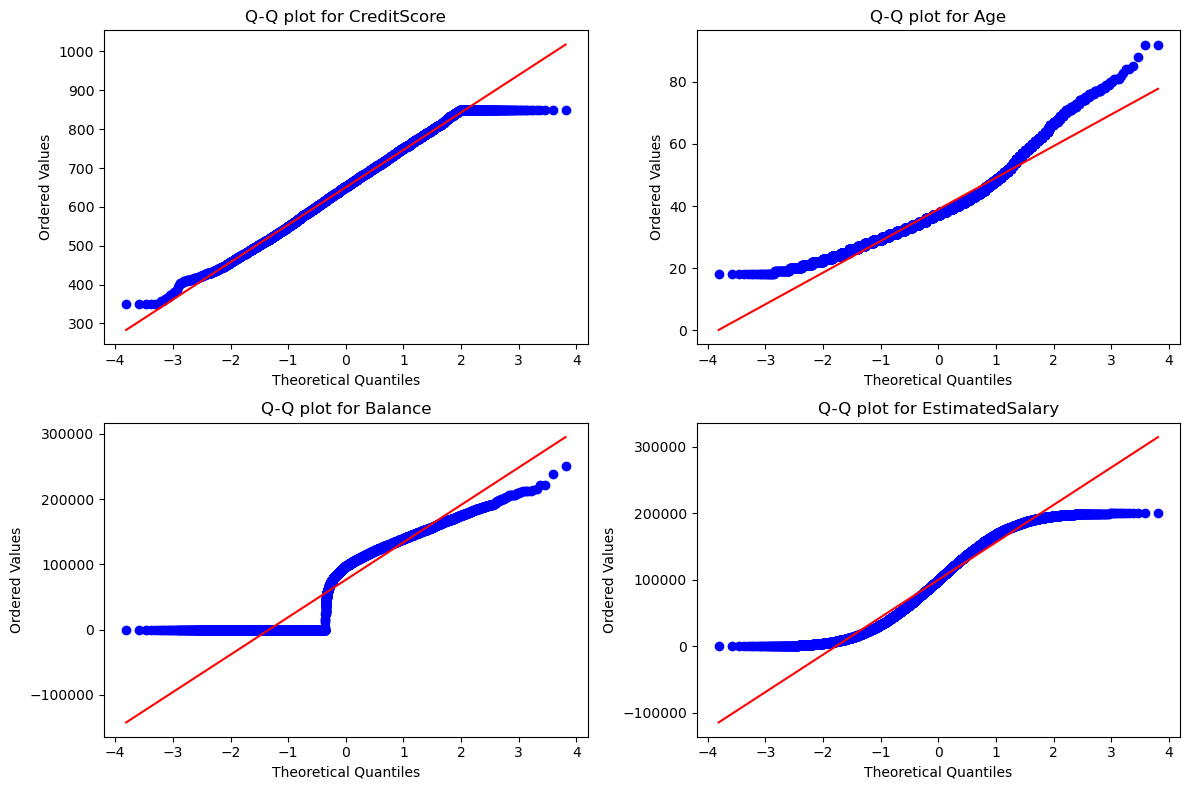

In [23]:
# Checking for normality of the data using Q-Q plots for the numerical columns: CreditScore, Age, Balance, EstimatedSalary

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for index, column in enumerate(num_columns):
    row = index // 2
    col = index % 2
    stats.probplot(clean_df[column], dist="norm", plot=axes[row, col])
    axes[row, col].set_title(f'Q-Q plot for {column}')
    axes[row, col].set_xlabel('Theoretical Quantiles')
    axes[row, col].set_ylabel('Ordered Values')
    
plt.tight_layout()
plt.show()

**Conclusions:**

- The **CreditScore** column data is generally normally distributed, but shows some deviations in the tails, which is quite typical for this type of data.
- A similar result is observed for the **Age** column. We will further explore why this is the case and which age group is most prevalent in the sample.
- The distribution in the **Balance** column exhibits obvious deviations. This might be due to the majority of customers having a zero balance, while a small portion has very high balances.
- The **EstimatedSalary** column shows deviations at both ends. This could be due to the presence of both extremely low and extremely high salary values.


In [25]:
# Exploring the data in these columns further using statistical measures. For convenience, we will round the results to 2 decimal places.

with pd.option_context('display.precision', 2):
    display(clean_df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].describe())

,CreditScore,Age,Balance,EstimatedSalary
count,9996.00,9996.00,9996.00,9996.00
mean,650.50,38.92,76476.26,100106.70
std,96.62,10.49,62397.12,57513.31
min,350.00,18.00,0.00,11.58
25%,584.00,32.00,0.00,51002.11
50%,652.00,37.00,97173.29,100238.11
75%,717.25,44.00,127639.37,149400.11
max,850.00,92.00,250898.09,199992.48


**Conclusions:**

- In the **CreditScore** column, the values are fairly normally distributed because credit scores typically fall within a specific limited range. However, there is a noticeable difference between the minimum and maximum values, which explains the deviations observed in the tails on the Q-Q plot.
- In the **Age** column, the minimum value is 18, meaning all individuals in the sample are of legal age, which is typical for bank customers. 75% of all users are younger than 44 years old. This is why we observed such a distribution on the Q-Q plot, with deviations in the tails, as the data is primarily concentrated around middle-aged users.
- 25% of the values in the **Balance** column are zero, and 75% of customers have a balance less than 127,639.37. The maximum value in this column is 250,898.09, which is almost twice the 75th percentile. This is why we saw such a significant deviation on the Q-Q plot.
- The **EstimatedSalary** column shows a substantial difference between the minimum (11.58, which seems anomalous) and maximum values. Considering the difference between the 25th percentile (51,002.11) and the 75th percentile (149,400.11), we can conclude that most customers have relatively high salaries.

## Let's move on to deeper data exploration and insights discovery

**1. Distribution of average estimated salary by gender and country.**

In [29]:
mean_salary_by_gender = clean_df.pivot_table(index = 'Geography', columns = 'Gender', values = 'EstimatedSalary', aggfunc = {'EstimatedSalary': ['mean']})
display(mean_salary_by_gender.style.format("{:.2f}").background_gradient(low=0.9, high=1.0, cmap='bwr'))

**Conclusion:**

The highest average estimated salary is found among women in Germany and men in France. On the other hand, the lowest average estimated salary is seen among men in Spain and women in France. Since we only have data on the estimated salary, which may be determined by various factors such as education, position, marital status, etc., this indicator might not reflect the actual salary levels of the bank's customers in these countries. However, it will be useful to compare these data with other indicators (e.g., balance or the number of products per customer) to explore possible patterns further.


**2. Visualization of the age distribution of bank customers.**

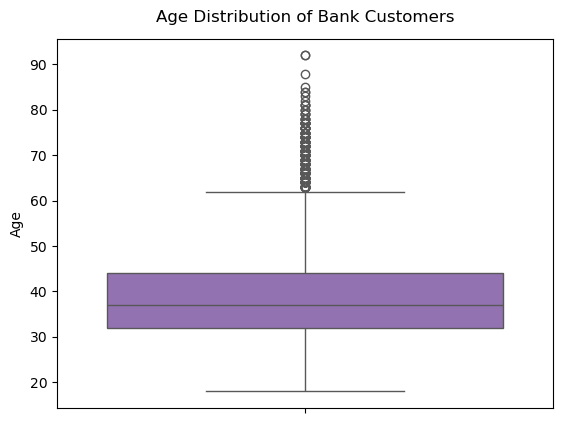

In [32]:
ax = sns.boxplot(y='Age', data=clean_df, color='tab:purple')
ax.set_title('Age Distribution of Bank Customers', pad=12)
ax.set_xlabel('')
ax.set_ylabel('Age')
plt.show();

**Conclusion:**

The results of the age distribution of bank customers confirm the previous assumption that the majority of the bank's customers are of middle age. However, we also observe "outliers," meaning there is a significant number of customers aged between 62 and 92. This group is anomalous within the dataset and is also not very financially active, using fewer banking products (mainly receiving payments, rarely making deposits, and not using credit products due to age restrictions imposed by banks).


**3. Distribution of the bank experience duration of customers.**

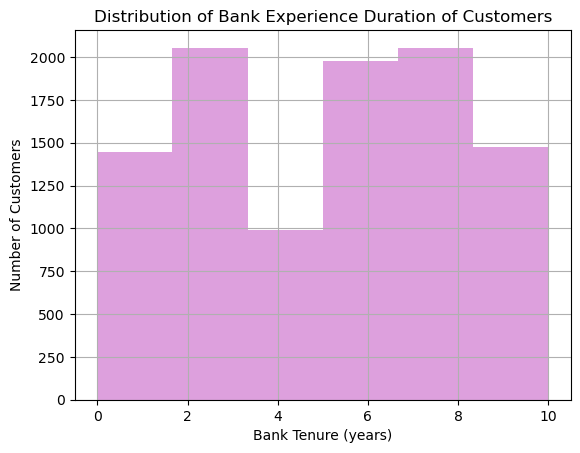

In [35]:
clean_df['Tenure'].hist(bins=6, color='plum', alpha=1)
plt.title('Distribution of Bank Experience Duration of Customers', fontsize=12)
plt.xlabel('Bank Tenure (years)', fontsize=10)
plt.ylabel('Number of Customers', fontsize=10)
plt.show();

**Conclusion:**

The largest number of people in the sample are bank customers with a tenure between 1.5 to 3 years, as well as between 7 and a little over 8 years. At the same time, we have fewer data on customers who have recently started banking (0 to 1.5 years), and there is a significantly smaller number of customers with an average tenure (3 to 5 years).

Next, I suggest exploring whether the length of time a customer has been with the bank affects their credit score.

**4. Impact of bank tenure on customers' credit scores by country.**

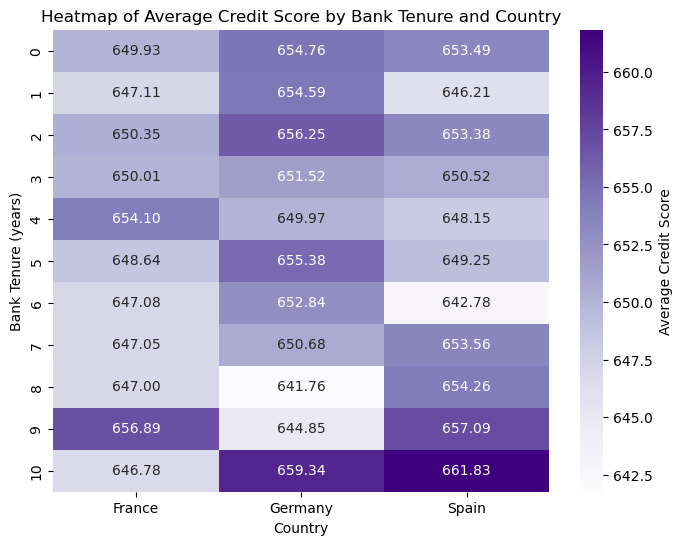

In [38]:
credit_score_tenure_geo = clean_df.pivot_table(index='Tenure', columns='Geography', values='CreditScore', aggfunc='mean')

plt.figure(figsize=(8, 6))
ax = sns.heatmap(credit_score_tenure_geo, annot=True, fmt=".2f", cmap='Purples', cbar_kws={'label': 'Average Credit Score'})
plt.title('Heatmap of Average Credit Score by Bank Tenure and Country')
plt.xlabel('Country')
plt.ylabel('Bank Tenure (years)')
plt.show();

**Conclusion:**

The heatmap shows that there is no significant relationship between the number of years a person has been a customer of the bank and their credit score. It is most likely that the credit score is determined based on factors such as income level, education, profession, real estate ownership, and previous credit history, rather than the duration of the customer's relationship with the specific bank. Additionally, we can observe that the average credit scores for customers in different countries are quite similar, which may suggest that the data were generated. In the next step, I propose to take a closer look at the distribution of credit scores for different countries.

**5. Distribution of credit score values by country.**

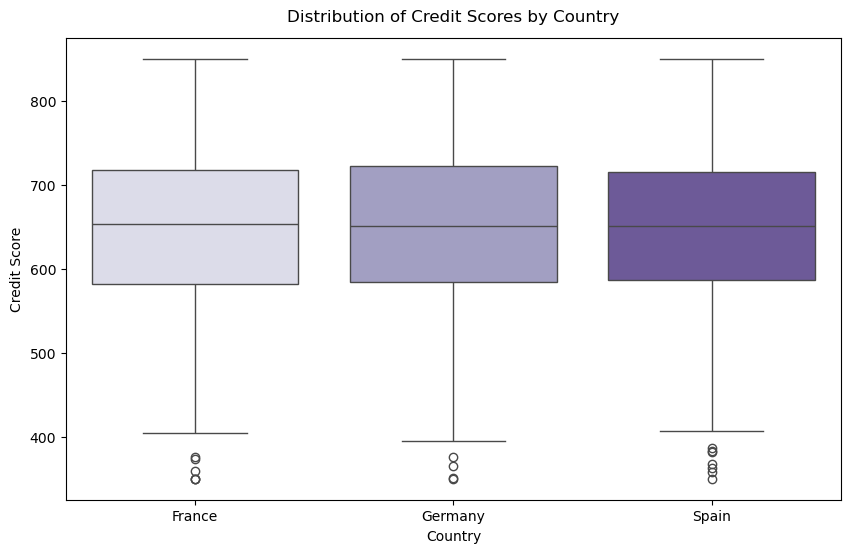

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Geography', y='CreditScore', data=clean_df, palette='Purples')
plt.xticks(ticks=range(len(clean_df['Geography'].unique())), 
           ha='center')
plt.title('Distribution of Credit Scores by Country', pad=12)
plt.xlabel('Country')
plt.ylabel('Credit Score')
plt.show();

**Conclusion:**

The results from the boxplot visualization confirm that credit score values across different countries show only minor differences. The data spread is slightly smaller in Spain, and the minimum value is the lowest in Germany. The highest number of "outliers" in credit score values is observed in customers from Spain, which might be linked to anomalies in the data.

This could be due to the following factors:
- The data might have been generated or processed in a way that creates an uneven distribution.
- It is possible that credit scores in European countries are calculated using the same algorithm, and the score must not fall below a certain threshold for a customer to be eligible for banking services, which may explain why customers with lower scores are absent from the dataset.

**6. Impact of estimated salary on customer credit score.**

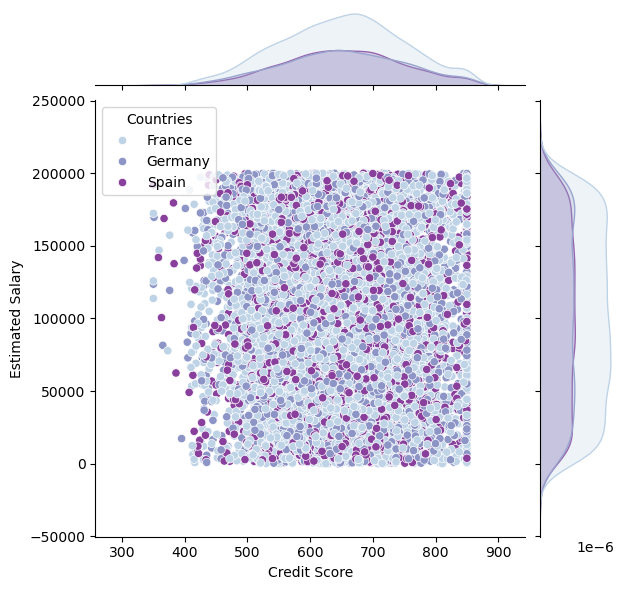

In [44]:
g = sns.jointplot(data=clean_df, x='CreditScore', y='EstimatedSalary', hue='Geography', palette='BuPu')
g.set_axis_labels('Credit Score', 'Estimated Salary')
legend = g.ax_joint.get_legend()
legend.set_title('Countries')
plt.show();

**Conclusion:**

From the plot, we can observe that there is no obvious correlation between the increase in estimated salary and the credit score.

- The data points are densely distributed along both the x-axis and y-axis, forming a square-like shape. This suggests that the data in the examined columns, CreditScore and EstimatedSalary, have quite limited values (possibly many repeated values).
- Visually, it appears that most of the data belongs to customers from France. For French clients, those with a credit score around 650 have the largest number of estimated salary values reaching up to 200,000. Additionally, many users have quite high credit scores (around 850) across a wide range of estimated salary values (from 11 to 200,000). This indicates that there is no clear correlation between the two variables.

**Calculate the Pearson correlation coefficient between CreditScore and EstimatedSalary**

In [47]:
correlation = clean_df[['CreditScore', 'EstimatedSalary']].corr()
print(correlation)

                 CreditScore  EstimatedSalary
CreditScore         1.000000        -0.001082
EstimatedSalary    -0.001082         1.000000


**Conclusion:**

The calculated Pearson correlation coefficient between CreditScore and EstimatedSalary is -0.001082, which supports our hypothesis that there is virtually no linear correlation between credit score and estimated salary.


**7. Comparison of active and inactive customers.**

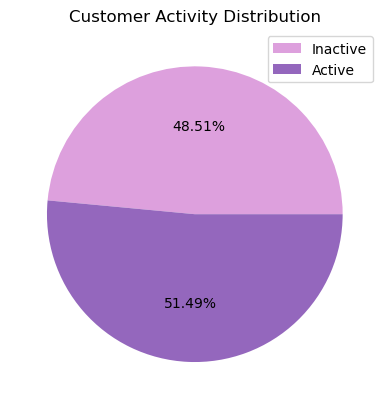

In [50]:
active_customer = clean_df.groupby('IsActiveMember')['CustomerId'].count()

plt.pie(active_customer, autopct = '%1.2f%%', colors=['plum', 'tab:purple'])
plt.title('Customer Activity Distribution')
plt.legend(labels = ['Inactive', 'Active'])
plt.show();

**Conclusion:**

The number of active and inactive users in our dataset is almost equal, with a slight difference of 3%.

Next, I propose to explore the possible relationship between the number of products (NumOfProduct) and user activity (IsActiveMember).

**8. The Impact of User Activity on the Number of Selected Products.**

In [53]:
# Convert 'IsActiveMember' to numeric type for conducting a t-test
clean_df['IsActiveMember'] = pd.to_numeric(clean_df['IsActiveMember'], errors='coerce')
print(clean_df['IsActiveMember'].dtype)

float64


In [54]:
# Separate the products based on user activity
active_products = clean_df[clean_df['IsActiveMember'] == 1]['NumOfProducts']
inactive_products = clean_df[clean_df['IsActiveMember'] == 0]['NumOfProducts']

**Hypotheses:**

- **Null hypothesis (H₀):** There is no significant difference in the number of products selected between active and inactive users.
- **Alternative hypothesis (H₁):** There is a significant difference in the number of products selected between active and inactive users.

In [56]:
# Conduct t-test
t_stat, p_value = stats.ttest_ind(active_products, inactive_products)

# Set significance level (α = 0.05)
alpha = 0.05

# Check if p-value is less than significance level
if p_value < alpha:
    print(f"The p-value ({p_value:.4f}) is less than the significance level ({alpha}), so we reject the null hypothesis.")
else:
    print(f"The p-value ({p_value:.4f}) is greater than or equal to the significance level ({alpha}), so we do not reject the null hypothesis.")


The p-value (0.3354) is greater than or equal to the significance level (0.05), so we do not reject the null hypothesis.


**Conclusion:**

There is no statistically significant difference between the activity of a user and the number of products they use.

**9. Number of Products of Customers by Country.**

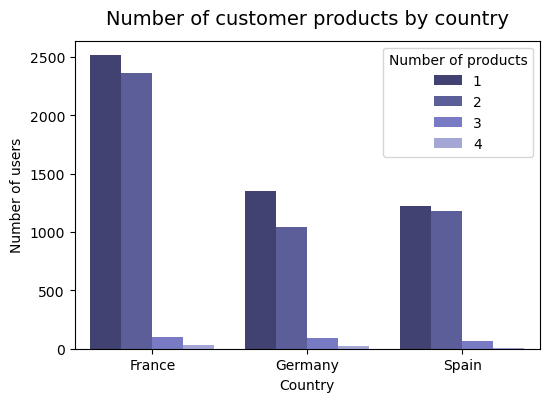

In [59]:
plt.figure(figsize=(6, 4))
sns.countplot(data=clean_df, x='Geography', hue='NumOfProducts', palette='tab20b')
plt.title('Number of customer products by country', fontsize=14, pad=12)
plt.xlabel('Country')
plt.ylabel('Number of users')
plt.legend(title='Number of products')
plt.show();

**The data from the countplot allow us to make the following observations:**

- We have the most information about the number of products used by a single person for users from France;
- The vast majority of users from all countries choose only one product, while slightly fewer users have two products;
- In Spain, nearly the same number of clients choose one or two products;
- The number of users with three or four products is very low in our sample.

**10. Distribution of the Number of People with Credit Cards by Age.**

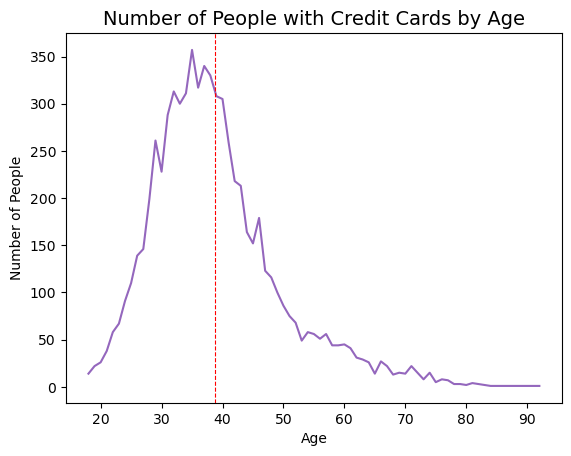

In [62]:
has_cr_card = clean_df[clean_df['HasCrCard'] == 1]

has_cr_card_by_age = has_cr_card.groupby('Age').size().reset_index(name='Count')
mean_has_cr_card_by_age = has_cr_card['Age'].mean()

sns.lineplot(data=has_cr_card_by_age, x='Age', y='Count', color='tab:purple')
plt.title('Number of People with Credit Cards by Age', fontsize=14)
plt.axvline(x=mean_has_cr_card_by_age, color='red', linestyle='--', linewidth=0.8)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show();

**Conclusions:**  
- The majority of credit card users fall within the age range of 32 to 42, meaning they are middle-aged individuals.  
- The average age of a typical credit card holder is 38 years.  
- There is a sharp decline in users after the age of 52.  
- After the age of 82, the number of credit card holders drops significantly, which is logical since banks often have age restrictions for individuals who wish to use a credit liit.


**11. Customer Segmentation by Account Balance Level.**


In the banking sector, it is common practice to classify customers based on the amount of money they deposit in the bank.

Classifying customers allowus s o:
- personalize service and improve customer interactions by offering appropriate financial products and services;
- choose the right recommendation stra.egy;
- optimize marketing campaigns;
- manage risks and revenue more effectively.

In this case, we will attempt to segment customers based on their account balance using the K-Means clustering method. This method allows us to adapt to the natural distribution of balance data among customers. This is important, as we have already established that 25% of all customers have a zero balance. Other classification methods could distort the results due to such a high percentage of customers with a zero balance.

For further analysis, we will divide customers based on their balance evel into:
- **basic** — customers with a minimal balance;
- **middle** — customers with a medium balance;
- **premium** — customers with a igh balance.


In [66]:
balance = clean_df[['Balance']]  

kmeans = KMeans(n_clusters=3, random_state=42)
clean_df['BalanceCategory'] = kmeans.fit_predict(balance)

In [67]:
clean_df['BalanceCategory'] = clean_df['BalanceCategory'].replace({0: 'basic', 1: 'middle', 2: 'premium'})
clean_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceCategory
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1.0,1.0,101348.88,1,basic
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0.0,1.0,112542.58,0,premium
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1.0,0.0,113931.57,1,middle
3,15701354,Boni,699,France,Female,39,1,0.00,2,0.0,0.0,93826.63,0,basic
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1.0,0.0,149756.71,1,premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1.0,0.0,96270.64,0,basic
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1.0,1.0,101699.77,0,premium
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0.0,1.0,42085.58,1,basic
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1.0,0.0,92888.52,1,premium


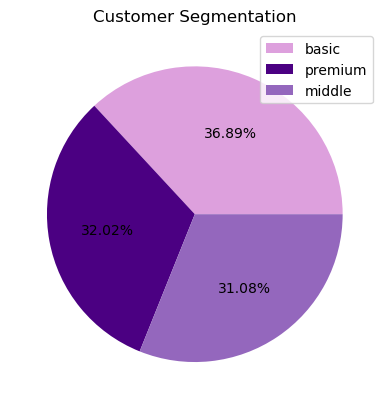

In [68]:
balance_cat = clean_df.groupby('BalanceCategory')['CustomerId'].count().sort_values(ascending=False)

plt.pie(balance_cat, autopct = '%1.2f%%', colors=['plum', 'indigo', 'tab:purple'])
plt.title('Customer Segmentation')
plt.legend(labels = clean_df['BalanceCategory'])
plt.show();

**Conclusions:**  
- As expected, the majority of customers belong to the **basic** group, since most clients likely have smaller account balances.  
- Interestingly, there are quite a few customers in the **premium** and **middle** segments. However, considering the average account balance (76,476.26), we can conclude that the dataset includes a significant number of customers with relatively high balances.  
- Overall, the difference between the three groups (basic, middle, premium) is not substantial, so none of them dominates the overall distributin.


**12. Customer churn rate for different customer categories.**

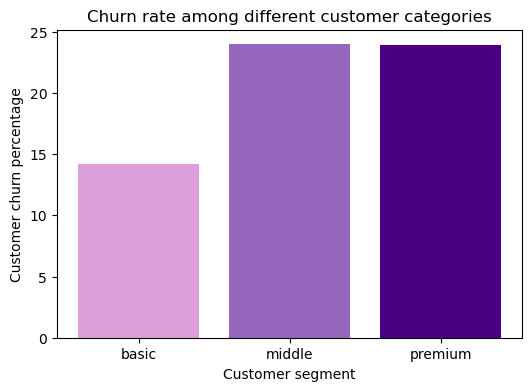

In [71]:
clean_df['Exited'] = clean_df['Exited'].astype(int)

bal_cat_exited = clean_df.groupby('BalanceCategory')['Exited'].agg(['sum', 'count'])
bal_cat_exited ['ExitPercentage'] = (bal_cat_exited ['sum'] / bal_cat_exited ['count']) * 100

plt.figure(figsize=(6, 4))
plt.bar(bal_cat_exited .index, bal_cat_exited ['ExitPercentage'], color=['plum', 'tab:purple', 'indigo'])
plt.title('Churn rate among different customer categories', fontsize=12)
plt.xlabel('Customer segment', fontsize=10)
plt.ylabel('Customer churn percentage', fontsize=10)
plt.show();

**Conclusions:** Customers from the middle and premium segments have the same churn rates — around 24%, while the basic customer category shows significantly better results — 14%. Given this, attention should be focused on the further engagement of middle and premium segment clients, as their churn is higher. This may indicate the need for additional loyalty measures, special offers, or improved service to reduce the churn risk. It may be worth focusing on enhancing the conditions for these clients to retain them in the bank.


 # 💳 General Conclusions

After analyzing the bank customer data from Spain, France, and Germany, we can draw a number of important conclusions that help to better understand the characteristics of the customer base:

1. **Estimated Salary:** The average estimated salary has very little variation between people of different genders who live in different countries. There was no correlation found between this indicator and the credit score. It is assumed that this is due to many different factors (such as education, job position, marital status, etc.) affecting the estimated salary, and its contribution to the credit score calculation is not significant. It would be useful to have data on the actual average monthly salary of a customer to assess their ability to service credit obligations.

2. **Customer Tenure:** The largest number of customers in the sample have been with the bank for 1.5 to 3 years and 7 to 8 years. There is less data available for new customers and those with an intermediate tenure. No significant effect of the length of service in the bank on the customer’s credit score was found. It is likely that the credit score is calculated based on income level, education, profession, property ownership, and previous credit history, and the duration of the customer’s relationship with a specific bank does not significantly affect it. Therefore, it would be useful to complement our dataset with such data that would allow us to more accurately examine which specific factors form the credit score.

3. **Active and Inactive Users:** There are almost the same number of active and inactive users in the sample (with a 3% difference). This indicates that we have a large number of customers (almost 49%) who likely have accounts in the bank but either do not use them or use them infrequently (possibly only for receiving payments). Therefore, it would be beneficial to improve interaction with this group (launch advertising campaigns, encourage them to meet certain conditions to receive a higher interest rate on deposits, offer additional services, etc.).

4. **Credit Card Users by Age:** Most credit card users are in the middle age group, but there is a significant amount of anomalous data among older individuals, who usually do not use banking products much. This situation is generally applicable to all bank customers, with the average age of clients being 37 years. It is worth considering how to attract a younger audience (from 18 years old); here, attention could be focused on improving the mobile app and providing additional bonuses for its use.

5. **Segmentation Based on Balance:** Using customer segmentation based on balance reflects a common banking practice. Thus, using the KMeans tool, we divided all users into three groups (basic, middle, and premium) and found that there is no significant quantitative advantage for any of the groups in the analyzed dataset.

6. **Churn Rate by Balance Category:** The churn rate is highest in the middle and premium segments, which requires attention to improve the conditions for these customers (upgrading card types, conducting promotions to increase transactions, and offering additional bonuses with possible partner involvement).

In general, the results obtained allow for the development of personalized customer service strategies and improvements in banking products.